In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


raw_data = pd.read_csv("./data.csv", index_col =0)

pd.set_option("display.max_colwidth",None)
#pd.set_option("display.max_rows",raw_data.shape[0]+1)

raw_data

,Date,Headline,Comment,Rating
0,2021-09-05T01:49:54Z,Great Service,Very easy process and great quality produce. Happy to recommend this service to anyone especially during this lockdown. Thanks HF.,5
1,2021-09-04T22:51:01Z,The food is absolutely amazing as is the service which is fantastic as well.,"The food from company name is excellent, extremely fresh and beautifully packaged. The website is very easy to use and the delivery service is fantastic. Considering the adversities at the present moment with COVID it is an amazing service to households. I would thoroughly recommend to everyone.",5
2,2021-09-04T11:27:01Z,Fresh and great service!!,"Fruits, vegetables and seafood are always fresh and also other products are great too!! I am a very happy customer. I would definitely shop again!",5
3,2021-09-04T09:00:13Z,Simple environmental considerations,"The service was great as was the produce. However, I was disappointed that I received a giant cardboard box approx 60 x40cm which contained 2 small items- a loaf of bread and crumpets. It made me consider if I could justify ordering online in future.",3
4,2021-09-04T05:59:18Z,Two great experiences sending gourmet food,Have used company name twice to send gourmet foods to an elderly family member in lockdown. Have been extremely happy both times.,5
...,...,...,...,...
220,2021-07-25T04:53:04Z,Excellent quick service & delicious products,Dairy free cheese & dip delicious. Dairy & gluten free items are different to what you can buy in a supermarket. Excellent products & service,5
221,2021-07-25T03:56:02Z,Good service and great produce.,"Delivery arrived on time with great tracking, and all my items where packed perfectly with cold items still quite cold. The only fault would be the milk I received only had one day before expiry which was not helpful at all, especially given the fact that I know that this particular milk comes with quite a lengthy expiry. Overall great service, fresh produce and I would definitely recommend using HF.",5
222,2021-07-25T02:19:37Z,I'm so excited!,"I'm so impressed by the delivery service, range of products offered and beautiful fresh produce. Will order HF home delivery every week now.",5
223,2021-07-24T08:07:23Z,Never disappoints.,Produce is fresh and full of flavour. Packaging is protective of produce and very efficient in keeping it at its optimum temperature. Delivery is prompt and always on time.,5


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      225 non-null    object
 1   Headline  225 non-null    object
 2   Comment   225 non-null    object
 3   Rating    225 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.8+ KB


In [3]:
raw_data.describe()

,Rating
count,225.000000
mean,4.293333
std,1.323955
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
raw_data["Rating"].value_counts()

5    162
1     23
4     21
3     11
2      8
Name: Rating, dtype: int64

# Data Cleaning

In [5]:
#pd.reset_option("display.max_rows")
import re

review_data = raw_data.copy()
review_data.columns = review_data.columns.str.lower()

#remove some line break etc.
review_data["comment"].replace(r"\t+|\n+|\r+","",regex = True, inplace = True)
review_data["headline"].replace(r"\t+|\n+|\r+","",regex = True, inplace = True)

review_data["comment"]= review_data["comment"].str.lower()
review_data["headline"]= review_data["headline"].str.lower()

#convert to date type
review_data["date"] = review_data["date"].str[:10]
review_data["date"] = pd.to_datetime(review_data["date"],format ="%Y-%m-%d")

#don't need special character
review_data["comment"] = review_data["comment"].map(lambda x: re.sub("[^A-Za-z0-9\s]+","",x))
review_data["headline"] = review_data["headline"].map(lambda x: re.sub("[^A-Za-z0-9\s]+","",x))

review_data

,date,headline,comment,rating
0,2021-09-05,great service,very easy process and great quality produce happy to recommend this service to anyone especially during this lockdown thanks hf,5
1,2021-09-04,the food is absolutely amazing as is the service which is fantastic as well,the food from company name is excellent extremely fresh and beautifully packaged the website is very easy to use and the delivery service is fantastic considering the adversities at the present moment with covid it is an amazing service to households i would thoroughly recommend to everyone,5
2,2021-09-04,fresh and great service,fruits vegetables and seafood are always fresh and also other products are great too i am a very happy customer i would definitely shop again,5
3,2021-09-04,simple environmental considerations,the service was great as was the produce however i was disappointed that i received a giant cardboard box approx 60 x40cm which contained 2 small items a loaf of bread and crumpets it made me consider if i could justify ordering online in future,3
4,2021-09-04,two great experiences sending gourmet food,have used company name twice to send gourmet foods to an elderly family member in lockdown have been extremely happy both times,5
...,...,...,...,...
220,2021-07-25,excellent quick service delicious products,dairy free cheese dip delicious dairy gluten free items are different to what you can buy in a supermarket excellent products service,5
221,2021-07-25,good service and great produce,delivery arrived on time with great tracking and all my items where packed perfectly with cold items still quite cold the only fault would be the milk i received only had one day before expiry which was not helpful at all especially given the fact that i know that this particular milk comes with quite a lengthy expiry overall great service fresh produce and i would definitely recommend using hf,5
222,2021-07-25,im so excited,im so impressed by the delivery service range of products offered and beautiful fresh produce will order hf home delivery every week now,5
223,2021-07-24,never disappoints,produce is fresh and full of flavour packaging is protective of produce and very efficient in keeping it at its optimum temperature delivery is prompt and always on time,5


In [6]:
#there are emojis in the comment, create a list to have all these emojis
#obsolete - use regex earlier to clean them up

# from emoji import UNICODE_EMOJI
# emoji_list = []

# for text in abc["new_comment"]:
#     for char in text:        
#         emoji_list.append(char) if char in UNICODE_EMOJI["en"] else None
        
# print (emoji_list)

# for item in emoji_list:
#     review_data["comment"].replace(item,"", regex= True,inplace=True)
    
# review_data.tail()

# EDA

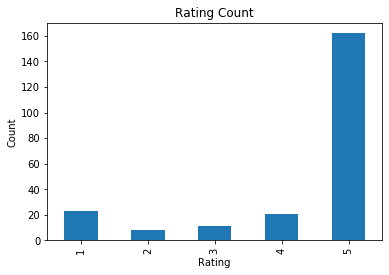

In [7]:
review_data["rating"].value_counts().sort_index().plot.bar()
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Count")
plt.show()

In [8]:
#combine headline to comment into one column
review_data["message"] = review_data["headline"] + " " + review_data["comment"]
review_data.drop(columns={"headline","comment","date"}, inplace=True)
review_data.head(3)

,rating,message
0,5,great service very easy process and great quality produce happy to recommend this service to anyone especially during this lockdown thanks hf
1,5,the food is absolutely amazing as is the service which is fantastic as well the food from company name is excellent extremely fresh and beautifully packaged the website is very easy to use and the delivery service is fantastic considering the adversities at the present moment with covid it is an amazing service to households i would thoroughly recommend to everyone
2,5,fresh and great service fruits vegetables and seafood are always fresh and also other products are great too i am a very happy customer i would definitely shop again


In [9]:
#create function to return text without stopwords, 
#Also use lemmmatizer to return base word

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words()
stopwords.append("company name")
stopwords.append("company")

def text_preprocessing(text):    
    tokens = word_tokenize(text)
    tokens_no_sw = [word for word in tokens if not word in stopwords]
    lemma_token = [lemmatizer.lemmatize(token) for token in tokens_no_sw ]
    new_text = (" ").join(lemma_token)
    
    return new_text

In [10]:
#apply text_preprocessing and divide into three categories

review_cat = review_data.copy()

good_comment = review_cat[(review_data["rating"] == 4) |(review_cat["rating"] == 5)]["message"].apply(text_preprocessing)
bad_comment = review_cat[(review_data["rating"] == 1) |(review_cat["rating"] == 2)]["message"].apply(text_preprocessing)
neutral_comment = review_cat[review_data["rating"] == 3]["message"].apply(text_preprocessing)

In [11]:
#Get the most common words in each cat

from collections import Counter

good_tokens = Counter(" ".join(good_comment).split()).most_common(20)
neutral_tokens = Counter(" ".join(bad_comment).split()).most_common(20)
bad_tokens = Counter(" ".join(neutral_comment).split()).most_common(20)

print("Token for good review: \n",good_tokens,"\n")
print("Token for neutral review: \n",neutral_tokens,"\n")
print("Token for bad review: \n",bad_tokens)

Token for good review: 
 [('delivery', 127), ('service', 107), ('quality', 101), ('great', 96), ('fresh', 89), ('produce', 84), ('product', 70), ('online', 69), ('order', 67), ('time', 64), ('good', 57), ('fruit', 52), ('food', 48), ('easy', 42), ('excellent', 42), ('item', 36), ('well', 35), ('box', 33), ('lockdown', 32), ('always', 31)] 

Token for neutral review: 
 [('delivery', 45), ('order', 39), ('item', 27), ('service', 21), ('online', 19), ('time', 19), ('missing', 17), ('would', 15), ('customer', 14), ('ordered', 13), ('day', 12), ('delivered', 12), ('4', 9), ('email', 9), ('received', 8), ('refund', 8), ('first', 8), ('experience', 7), ('ordering', 7), ('get', 7)] 

Token for bad review: 
 [('delivery', 15), ('product', 11), ('order', 6), ('replacement', 6), ('however', 5), ('box', 5), ('happy', 5), ('time', 5), ('first', 5), ('great', 4), ('item', 4), ('made', 4), ('substitution', 4), ('fresh', 4), ('packaged', 4), ('disappointed', 3), ('received', 3), ('bread', 3), ('could'

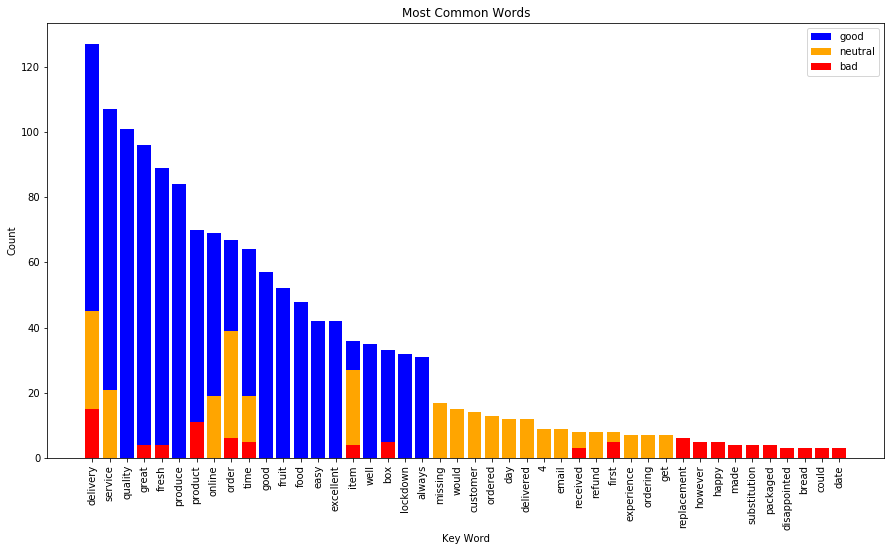

In [12]:
plt.figure(figsize=(15,8))

x_good = [tag for tag,count in good_tokens]
y_good = [count for tag,count in good_tokens]

x_neu = [tag for tag,count in neutral_tokens]
y_neu = [count for tag,count in neutral_tokens]

x_bad = [tag for tag,count in bad_tokens]
y_bad = [count for tag,count in bad_tokens]

plt.bar(x_good,y_good, color="blue")
plt.bar(x_neu,y_neu, color = "orange")
plt.bar(x_bad,y_bad, color = "red")

plt.xlabel("Key Word")
plt.ylabel("Count")
plt.title("Most Common Words")

plt.xticks(rotation=90)
plt.legend(["good","neutral","bad"], loc="upper right")

plt.show()

# Data Preparation for ML

In [13]:
#create new dataset. Rating 1,2 is bad(0), >3 is good(1)

ml_data = review_data.copy()
#classification of rating
ml_data["target"] = ml_data["rating"].apply(lambda x:0 if x==1 or x==2 else 1)

#remove unnecessary columns
ml_data.drop(columns={"rating"}, inplace=True)
#remove stop words
ml_data["message"]=ml_data["message"].apply(text_preprocessing)
ml_data.head(10)

,message,target
0,great service easy process great quality produce happy recommend service anyone especially lockdown thanks hf,1
1,food absolutely amazing service fantastic well food excellent extremely fresh beautifully packaged website easy use delivery service fantastic considering adversity present moment covid amazing service household would thoroughly recommend everyone,1
2,fresh great service fruit vegetable seafood always fresh product great happy customer would definitely shop,1
3,simple environmental consideration service great produce however disappointed received giant cardboard box approx 60 x40cm contained 2 small item loaf bread crumpet made consider could justify ordering online future,1
4,two great experience sending gourmet food used twice send gourmet food elderly family member lockdown extremely happy time,1
5,opening box like receiving colourful healthy surprise gift carefully packed beautifully fresh colourful box fruit vegetable brightens day minimal packaging maximum product,1
6,excellent quality thank quality produce always exciting unpack box appreciate plasticless packaging much sustainable,1
7,convenient way shop first online order found much better experience major supermarket fruit vegetable fresh grocery packed well,1
8,worst experience ever order online took 2 day arrive fine time slot booked 25pm arrived 845pm item missing invoiced prior notice product available chase would think item available able order time invoiced complete mess,0
9,fantastic quality second time delivery cant fault range excellent quality best,1


# Count Vectorizer for ML

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

y=ml_data["target"]

vectorizer = CountVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    binary=True
)

vectorizer.fit(ml_data["message"])
X= pd.DataFrame(
    data=vectorizer.transform(ml_data["message"]).todense(), 
    columns = vectorizer.get_feature_names()
)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=45, stratify =y)


# Knn ML model

Accuracy: 0.8676470588235294
Precision: 0.8676470588235294
Recall: 0.8676470588235294
Best estimator: KNeighborsClassifier(leaf_size=33, n_neighbors=98, weights='distance')


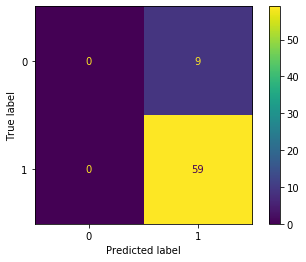

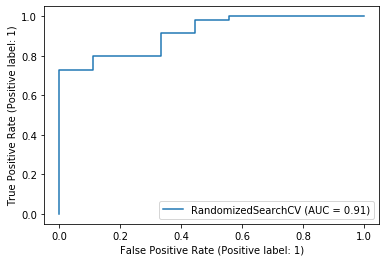

In [15]:
#KNN with hyperparrameters tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : list(range(5,100)),
               'weights' : ['uniform','distance'],
               'leaf_size' : list(range(10,40))}

rs = RandomizedSearchCV(KNeighborsClassifier(), grid_params,verbose = 0, cv=3, random_state = 55)

rs.fit(X_train,y_train)

predicted = rs.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test,predicted)}")
print(f"Precision: {metrics.precision_score(y_test,predicted)}")
print(f"Recall: {metrics.precision_score(y_test,predicted)}")

print(f"Best estimator: {rs.best_estimator_}")

metrics.plot_confusion_matrix(rs,X_test, y_test)
metrics.plot_roc_curve(rs,X_test, y_test)

# Logistics Regression ML

Accuracy: 0.9117647058823529
Precision: 0.9076923076923077
Recall: 0.9076923076923077


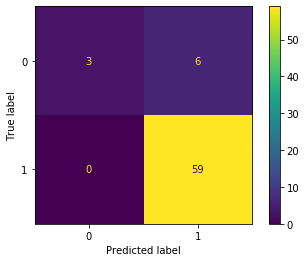

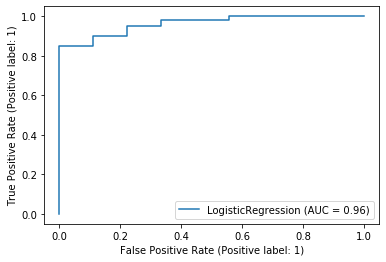

In [16]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression()
clr.fit(X_train, y_train)

predicted = clr.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test,predicted)}")
print(f"Precision: {metrics.precision_score(y_test,predicted)}")
print(f"Recall: {metrics.precision_score(y_test,predicted)}")

metrics.plot_confusion_matrix(clr,X_test, y_test)
metrics.plot_roc_curve(clr,X_test, y_test)

# Sentimental Analysis using TextBlob

In [17]:
from textblob import TextBlob

tb_data =review_cat.copy()
tb_data["target"] = tb_data["rating"].apply(lambda x:0 if x==1 or x==2 else 1)
tb_data["sentiment_score"] = tb_data["message"].apply(lambda x: TextBlob(x).sentiment.polarity)
tb_data["sentiment_target"] = tb_data["sentiment_score"].apply(lambda x: 1 if x>=0 else 0)
tb_data["check"] = (tb_data["target"]==tb_data["sentiment_target"])
tb_data.head(10)

,rating,message,target,sentiment_score,sentiment_target,check
0,5,great service very easy process and great quality produce happy to recommend this service to anyone especially during this lockdown thanks hf,1,0.527222,1,True
1,5,the food is absolutely amazing as is the service which is fantastic as well the food from company name is excellent extremely fresh and beautifully packaged the website is very easy to use and the delivery service is fantastic considering the adversities at the present moment with covid it is an amazing service to households i would thoroughly recommend to everyone,1,0.523704,1,True
2,5,fresh and great service fruits vegetables and seafood are always fresh and also other products are great too i am a very happy customer i would definitely shop again,1,0.439286,1,True
3,3,simple environmental considerations the service was great as was the produce however i was disappointed that i received a giant cardboard box approx 60 x40cm which contained 2 small items a loaf of bread and crumpets it made me consider if i could justify ordering online in future,1,-0.033333,0,False
4,5,two great experiences sending gourmet food have used company name twice to send gourmet foods to an elderly family member in lockdown have been extremely happy both times,1,0.800000,1,True
5,5,opening my box is like receiving a colourful healthy surprise gift carefully packed beautifully fresh and so colourful our box of fruit and vegetables brightens our day minimal packaging maximum product,1,0.150000,1,True
6,5,excellent quality thank you for your quality produce its always exciting to unpack the boxes i also appreciate your plasticless packaging so much more sustainable,1,0.600000,1,True
7,5,very convenient way to shop this was my first online order with company name and i found it to be a much better experience than other major supermarkets the fruit and vegetables were very fresh and the groceries were packed well,1,0.212917,1,True
8,1,worst experience ever did an order online took 2 days to arrive which is fine the time slot booked was between 25pm and it arrived at 845pm one item was missing and it was invoiced no prior notice about the product being not available until i had to chase up for it one would think when an item is not available you will not be able to order at the time and also not invoiced complete mess,0,-0.084259,0,True
9,5,fantastic quality this is the second time we have had a delivery from company name and i cant fault it the range is excellent and the quality is the best,1,0.600000,1,True


In [18]:
tb_data["sentiment_score"].describe()

count    225.000000
mean       0.338351
std        0.266183
min       -0.575000
25%        0.170833
50%        0.371667
75%        0.523704
max        1.000000
Name: sentiment_score, dtype: float64

In [19]:
highest_comment= tb_data[tb_data["sentiment_score"]==1]
highest_comment

,rating,message,target,sentiment_score,sentiment_target,check
39,5,very impressed this was my 1st order as in a lockdown area very impressed with produce tracking delivery we need a company name in our area please,1,1.0,1,True


In [20]:
lowest_score = tb_data["sentiment_score"].min()
lowest_comment= tb_data[tb_data["sentiment_score"]== lowest_score]
lowest_comment

,rating,message,target,sentiment_score,sentiment_target,check
72,1,terrible communication and service couldnt deliver at the selected time the alternative was not suitable and i stated that no response so i followed up again confirming it was not suitable to find they delivered anyway and now my fruit and veg has been sitting out all day not to mention my avocados have been smashed and my spinach is all wilted beyond disappointed,0,-0.575,0,True


In [21]:
check = tb_data[tb_data["check"]==False]
accuracy = 1 - len(check.index)/len(tb_data.index)
print (f"Number of incorrect label: {len(check.index)}")
print (f"Accuracy Score: {accuracy}")
check.head(5)


Number of incorrect label: 13
Accuracy Score: 0.9422222222222222


,rating,message,target,sentiment_score,sentiment_target,check
3,3,simple environmental considerations the service was great as was the produce however i was disappointed that i received a giant cardboard box approx 60 x40cm which contained 2 small items a loaf of bread and crumpets it made me consider if i could justify ordering online in future,1,-0.033333,0,False
27,1,please unpack now i need the blue bags back i have always loved shopping at hf but i found it is really annoying that the driver driver demand that please unpack now i need the blue bag isnt it meant to be a touch free deliverywe are more than happy to return the bags perhaps a blue bag recycle program will be helpful,0,0.177778,1,False
44,1,4 items missing mouldy pear first order my first order 18227 but 4 items missing cos lettuce 4 red capsicums broccoli 12 cauliflower and one pear was mouldy rang twice to ask for these items to be delivered offered a refund but i explained i needed the capsicums for a particular recipe i asked to speak to a supervisor or manager to arrange delivery of the missing items waited for a long time but none available told one would ring me but still waiting the remaining items in my order were in good condition a disappointing first order and poor customer service so far i am hoping that someone from company name can resolve this satisfactorily,0,0.033333,1,False
58,2,improve on price labels although the shop have a lot of good variety of food but could improve on labelling sometimes the label wasnt clear or no labels so we dont know the price which is not very helpful,0,0.233333,1,False
74,2,this can improve please my 4am to 7am delivery this morning friday 20th august 2021 the cold pack with 4 x 2l bottles of milk 8l was placed right on top of the cardboard box housing two live lettuces and half a dozen eggs and other purchases the lettuces were a bit squashed and one of the six eggs was cracked pp979798,0,0.004344,1,False


# Sentimental Analysis using Spacy

In [22]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

spacy_data = review_cat.copy()
spacy_data["target"] = spacy_data["rating"].apply(lambda x:0 if x==1 or x==2 else 1)

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

spacy_data["sentiment_score"] = spacy_data["message"].apply(lambda x: nlp(x)._.polarity)
spacy_data["sentiment_target"] = spacy_data["sentiment_score"].apply(lambda x: 1 if x>=0 else 0)
spacy_data["check"] = (spacy_data["target"]==spacy_data["sentiment_target"])

spacy_data.head()

C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: 

,rating,message,target,sentiment_score,sentiment_target,check
0,5,great service very easy process and great quality produce happy to recommend this service to anyone especially during this lockdown thanks hf,1,0.527222,1,True
1,5,the food is absolutely amazing as is the service which is fantastic as well the food from company name is excellent extremely fresh and beautifully packaged the website is very easy to use and the delivery service is fantastic considering the adversities at the present moment with covid it is an amazing service to households i would thoroughly recommend to everyone,1,0.523704,1,True
2,5,fresh and great service fruits vegetables and seafood are always fresh and also other products are great too i am a very happy customer i would definitely shop again,1,0.439286,1,True
3,3,simple environmental considerations the service was great as was the produce however i was disappointed that i received a giant cardboard box approx 60 x40cm which contained 2 small items a loaf of bread and crumpets it made me consider if i could justify ordering online in future,1,-0.033333,0,False
4,5,two great experiences sending gourmet food have used company name twice to send gourmet foods to an elderly family member in lockdown have been extremely happy both times,1,0.800000,1,True


In [23]:
print(spacy_data["sentiment_score"].describe())
highest_comment= spacy_data[spacy_data["sentiment_score"]==1]
highest_comment

count    225.000000
mean       0.338351
std        0.266183
min       -0.575000
25%        0.170833
50%        0.371667
75%        0.523704
max        1.000000
Name: sentiment_score, dtype: float64


,rating,message,target,sentiment_score,sentiment_target,check
39,5,very impressed this was my 1st order as in a lockdown area very impressed with produce tracking delivery we need a company name in our area please,1,1.0,1,True
